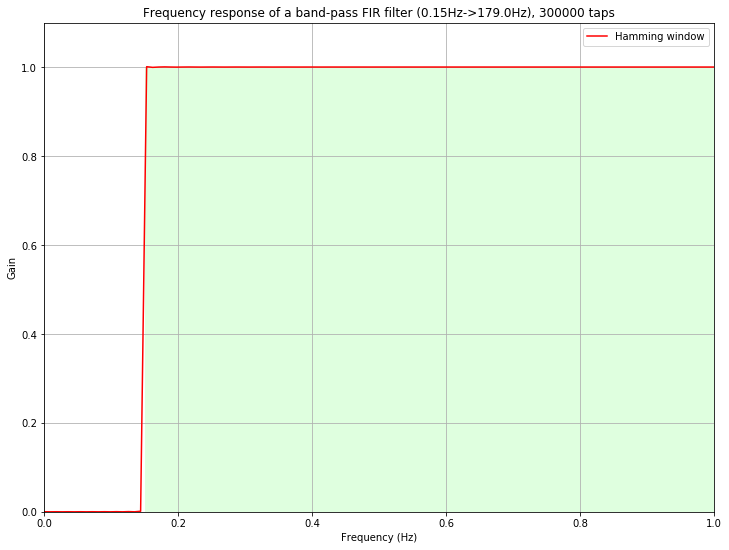

In [5]:
from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta

# Several flavors of bandpass FIR filters.

def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

def bandpass_kaiser(ntaps, lowcut, highcut, fs, width):
    nyq = 0.5 * fs
    atten = kaiser_atten(ntaps, width / nyq)
    beta = kaiser_beta(atten)
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=('kaiser', beta), scale=False)
    return taps

def bandpass_remez(ntaps, lowcut, highcut, fs, width):
    delta = 0.5 * width
    edges = [0, lowcut - delta, lowcut + delta,
             highcut - delta, highcut + delta, 0.5*fs]
    taps = remez(ntaps, edges, [0, 1, 0], Hz=fs)
    return taps


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 360.0
    lowcut = 0.15
    highcut = 0.5*fs-1

    ntaps = 300000
    taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs, window='hamming')
#     taps_hanning = bandpass_firwin(ntaps, lowcut, highcut, fs=fs, window='hanning')
#     taps_blackman = bandpass_firwin(ntaps, lowcut, highcut, fs=fs, window='blackman')
    
#     remez_width = 1.0
#     taps_remez = bandpass_remez(ntaps, lowcut, highcut, fs=fs,
#                                 width=remez_width)

    # Plot the frequency responses of the filters.
    plt.figure(1, figsize=(12, 9))
    plt.clf()

    # First plot the desired ideal response as a green(ish) rectangle.
    rect = plt.Rectangle((lowcut, 0), highcut - lowcut, 1.0,
                         facecolor="#60ff60", alpha=0.2)
    plt.gca().add_patch(rect)

    # Plot the frequency response of each filter.
    w, h = freqz(taps_hamming, 1, worN=20000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Hamming window", c='r')
#     w, h = freqz(taps_hanning, 1, worN=20000)
#     plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Hanning window")
#     w, h = freqz(taps_blackman, 1, worN=20000)
#     plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Blackman window")
    
#     w, h = freqz(taps_remez, 1, worN=2000)
#     plt.plot((fs * 0.5 / np.pi) * w, abs(h),
#              label="Remez algorithm, width=%.1f" % remez_width)
#     plt.plot([lowcut, lowcut], [0, 1])
#     plt.plot([highcut, highcut], [0, 1])
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.1)
    plt.grid(True)
    plt.legend()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.title('Frequency response of a band-pass FIR filter ({}Hz->{}Hz), {} taps'.format(lowcut, highcut, ntaps))

    plt.show()

In [ ]:
# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29
 
# Use firwin to create a lowpass FIR filter
fir_coeff = firwin(numtaps, cutoff_hz/nyq_rate)
 
# Use lfilter to filter the signal with the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)